In [1]:
import os, glob
from tqdm import tqdm
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams.update({'font.size': 20})
# plt.style.use('dark_background')
rc('pdf', fonttype=42)

import funcs

import imp
imp.reload(funcs)

C:\Users\nicol\AppData\Local\Temp\ipykernel_3888\1551013304.py:13: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'funcs' from 'W:\\people\\gritti\\IRIR\\code\\fig.5\\funcs.py'>

In [2]:
folder = os.path.join('W:',os.sep,'people','gritti','IRIR','pescoids','timelapse')

In [3]:
pxl_size = 6.5/16.6 #um/pxl
tp_step = 2.5 #minutes

# Visualize reconstructed image

In [4]:
gfp_files = glob.glob(os.path.join(folder, 'sigmoid', '*.tif')) 
gfp_files.sort()
ir2_files = glob.glob(os.path.join(folder, 'sigmoid_rest', '*.tif')) 
ir2_files.sort()

## Side by side timelapse

In [5]:
tps = np.arange(len(gfp_files))[::25]

In [6]:
tps

array([  0,  25,  50,  75, 100, 125, 150, 175, 200])

In [7]:
gfps = [imread(gfp_files[tp]) for tp in tqdm(tps)]
ir2s = [imread(ir2_files[tp]) for tp in tqdm(tps)]

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
fig,ax = plt.subplots(2,len(tps[::2]), figsize=(len(tps[::2]),2))
i = 0


for tp in tqdm(tps[::2], total=len(tps[::2])):
    vlims0 = np.percentile(gfps[i][::2,::4,::4],[3,99.7])
    vlims1 = np.percentile(ir2s[i][::2,::4,::4],[3,99.7])

    ax[0,i].imshow(
        np.max(gfps[i][120:140],0),
        cmap = 'gray',
        vmin=vlims0[0], vmax=vlims0[1],
    )
    ax[1,i].imshow(
        np.max(ir2s[i][120:140],0),
        cmap = 'gray',
        vmin=vlims1[0], vmax=vlims1[1],
    )
    
    i+=1

for a in ax.ravel():
    a.axis('off')
    
fig.savefig('Fig5_A.pdf', dpi=900)

## Side by side tp0

In [8]:
gfp_file = gfp_files[0]
ir2_file = ir2_files[0]
print(gfp_file, ir2_file)

W:\people\gritti\IRIR\pescoids\timelapse\sigmoid\pescoid1--C00--T00000.tif W:\people\gritti\IRIR\pescoids\timelapse\sigmoid_rest\T00000.tif


In [9]:
gfp_vol = imread(gfp_file)
ir2_vol = imread(ir2_file)

In [10]:
print(gfp_vol.shape,ir2_vol.shape)

(271, 1052, 1318) (271, 1052, 1318)


In [11]:
plane = 120
gfp = gfp_vol[plane]
ir2 = ir2_vol[plane]

In [12]:
width = 1318//6
y = 520
# xmin, xmax = [100,gfp.shape[1]-100]

In [13]:
combined = np.zeros(gfp.shape)
start = 0
i = 0
while (start+width)<gfp.shape[1]:
    if i%2==0:
        combined[:,start:start+width] = gfp[:,start:start+width]
    else:
        combined[:,start:start+width] = ir2[:,start:start+width]
    
    start = start+width
    i+=1

In [14]:
gfp_line = gfp[y,:]
gfp_line = (gfp_line-np.min(gfp_line))/(np.max(gfp_line)-np.min(gfp_line))

ir2_line = ir2[y,:]
ir2_line = (ir2_line-np.min(ir2_line))/(np.max(ir2_line)-np.min(ir2_line))


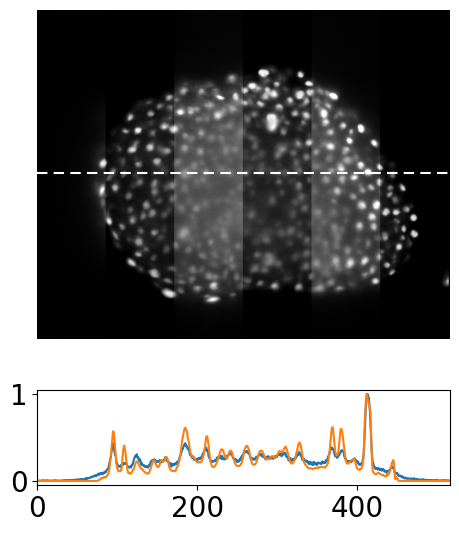

In [15]:
fig, ax = plt.subplots(2, 1,
                       figsize=(5,6),
                       height_ratios=[4, 1])
ax[0].imshow(
    combined, 
    cmap='gray', 
    vmin=np.percentile(combined,1.),
    vmax=np.percentile(combined,99.9),
)
ax[0].axhline(
    y = y,
#     xmin = xmin/gfp.shape[1],
#     xmax = xmax/gfp.shape[1],
    c='w', ls='--', dashes = [5,3],
)

pxl_size = 6.5/16.6

ax[1].plot(
    np.arange(len(gfp_line))*pxl_size, 
    gfp_line,
    c='tab:blue'
)
ax[1].plot(
    np.arange(len(ir2_line))*pxl_size, 
    ir2_line,
    c='tab:orange'
)

ax[0].axis('off')
ax[1].set_xlim(0,gfp.shape[1]*pxl_size)
for a in ax:
    a.set_anchor('W')
plt.tight_layout()

fig.savefig('Fig5_B.pdf', dpi=600)

# Visualize cell number over time

In [16]:
imp.reload(funcs)

<module 'funcs' from 'W:\\people\\gritti\\IRIR\\code\\fig.5\\funcs.py'>

In [17]:
### LOAD DATA
keys = ['old_id','old_parentid','cell_id','parent_id','lineage','timepoint','X','Y','Z','splitScore']
print('loading sigm...')
data_sig = np.loadtxt(os.path.join(folder,'sigmoid_results','TGMM_plots','file.txt'))
lasttp = np.max(data_sig[:,keys.index('timepoint')])
print('loading sigm_rest...')
data_sig_rest = np.loadtxt(os.path.join(folder,'sigmoid_rest_results','TGMM_plots','file.txt'))
lasttp = np.max(data_sig_rest[:,keys.index('timepoint')])


loading sigm...
loading sigm_rest...


sigmoid:
0.5879804535561092
0.15167946695533818


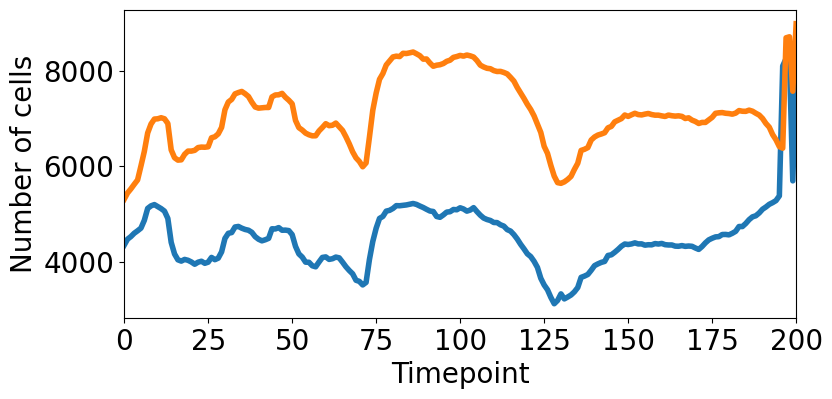

In [18]:
### CELL NUMBER OVER TIME
fig, ax = plt.subplots(1,1,figsize=(8,4))
fig.subplots_adjust(right=0.97,top=0.95,left=0.13,bottom=0.18)
ax.set_xlabel('Timepoint')
ax.set_ylabel('Number of cells')
# set_white_plot(ax)
n_cells_sig, _ = funcs.cell_number(data_sig, keys, 
                             ax=ax, color='tab:blue')
n_cells_sig_rest, _ = funcs.cell_number(data_sig_rest, keys, 
                                  ax=ax, color='tab:orange')
print('sigmoid:')
print(np.mean((n_cells_sig_rest-n_cells_sig)/n_cells_sig))
print(np.std((n_cells_sig_rest-n_cells_sig)/n_cells_sig))

ax.set_xlim(0, lasttp)

fig.savefig('Fig5_C.pdf', dpi=600)

# Visualize radial cell distribution

In [19]:
imp.reload(funcs)

<module 'funcs' from 'W:\\people\\gritti\\IRIR\\code\\fig.5\\funcs.py'>

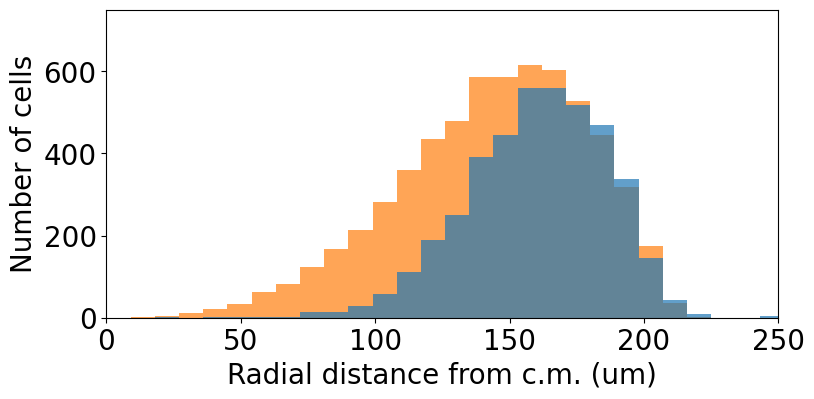

In [33]:
## RADIAL DISTRIBUTION OF CELLS
fig, ax = plt.subplots(1,1,figsize=(8,4))
fig.subplots_adjust(right=0.97,top=0.95,left=0.13,bottom=0.18)
ax.set_xlabel('Radial distance from c.m. (um)')
ax.set_ylabel('Number of cells')
# funcs.set_white_plot(ax)
funcs.radial_distribution(
    data_sig_rest, 
    keys, ax=ax, 
    color='tab:orange'
)
funcs.radial_distribution(
    data_sig, 
    keys, ax=ax, 
    color='tab:blue'
)
ax.set_xlim(0,250)
ax.set_ylim(0,750)

fig.savefig('Fig5_D.pdf', dpi=600)

# Visualize track lengths

In [21]:
imp.reload(funcs)
import pandas as pd

In [27]:
data_gfp = np.loadtxt(os.path.join(folder,'sigmoid_results','TGMM_plots','file.txt'))
data_ir2 = np.loadtxt(os.path.join(folder,'sigmoid_rest_results','TGMM_plots','file.txt'))
keys = ['old_id','old_parentid','cell_id','parent_id','lineage','timepoint','X','Y','Z','splitScore']



 15%|███████████▌                                                                | 8165/53943 [00:13<01:23, 551.37it/s]


 31%|███████████████████████▎                                                   | 16808/53943 [00:27<00:55, 663.52it/s]


 48%|███████████████████████████████████▋                                       | 25637/53943 [00:41<00:43, 654.78it/s]


 64%|███████████████████████████████████████████████▉                           | 34471/53943 [00:55<00:28, 674.24it/s]


 80%|████████████████████████████████████████████████████████████▎              | 43336/53943 [01:08<00:15, 682.05it/s]


 96%|███████████████████████████████████████████████████████████████████████▉   | 51714/53943 [01:22<00:03, 664.71it/s]


100%|███████████████████████████████████████████████████████████████████████████| 53943/53943 [01:26<00:00, 625.58it/s]

 29%|█████████████████████▏                                                    | 14506/50541 [00:10<00:22, 1569.55it/s]


 65%|████████████████████████████████████████████████▏                         | 32909/50541 [00:24<00:16, 1053.27it/s]


100%|██████████████████████████████████████████████████████████████████████████| 50541/50541 [00:37<00:00, 1331.15it/s]


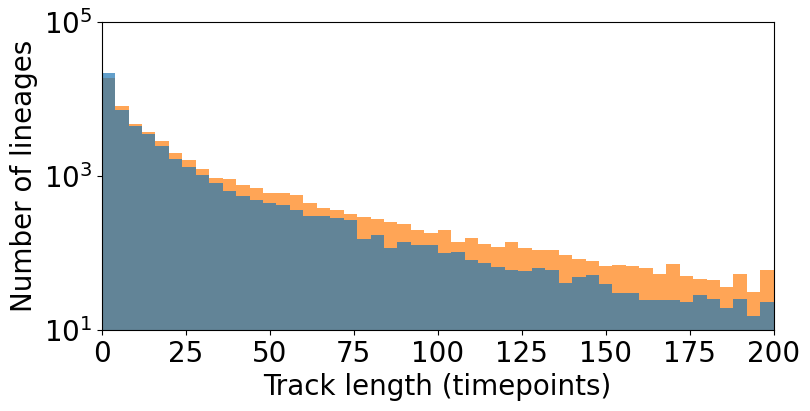

In [30]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
fig.subplots_adjust(right=0.97,top=0.95,left=0.13,bottom=0.18)
ax.set_xlabel('Track length (timepoints)')
ax.set_ylabel('Number of lineages')
lengths_rest = funcs.track_length(
    data_ir2, keys,
    every=1,
    ax=ax, color='tab:orange',
)
lengths_sig = funcs.track_length(
    data_gfp, keys,
    every=1,
    ax=ax, color='tab:blue',
)

ax.set_xlim(0,200)
ax.set_ylim(10,100000)

fig.savefig('Fig5_E.pdf', dpi=600)

In [31]:
f = np.sum(lengths_sig>25)/len(lengths_sig)
print('N_tracks longer than 25tp in rest:', 100*f)

f = np.sum(lengths_rest>25)/len(lengths_rest)
print('N_tracks longer than 25tp in raw:', 100*f)

N_tracks longer than 25tp in rest: 17.718288122514394
N_tracks longer than 25tp in raw: 24.549987950243775


# Make 3D visualization

## Timepoint 0

In [ ]:
gfp = imread(os.path.join(folder,'3d_views','pescoidT000_GFP.tif'))
ir2 = imread(os.path.join(folder,'3d_views','pescoidT000_IR2.tif'))

In [ ]:
gfp.shape

In [ ]:
conc = np.concatenate((gfp[:,:,:,0],ir2[:,:,:,0]), axis=1)

imsave(os.path.join(folder,'3d_views','GFP_IR2_TP000.tif'), conc.astype(np.uint16))

## Whole timelapse

In [ ]:
gfp = imread(os.path.join(folder,'3d_views','pescoidTL_GFP.tif'))
ir2 = imread(os.path.join(folder,'3d_views','pescoidTL_IR2.tif'))

In [ ]:
gfp.shape

In [ ]:
conc = np.concatenate((gfp[:,:,:,0],ir2[:,:,:,0]), axis=1)

imsave(os.path.join(folder,'3d_views','GFP_IR2_TL.tif'), conc.astype(np.uint16))

# Visualize individual tracks

In [4]:
### LOAD DATA
import pandas as pd
keys = ['old_id','old_parentid','cell_id','parent_id','lineage','timepoint','X','Y','Z','splitScore']
# print('loading sigm...')
# data_sig = np.loadtxt(os.path.join(folder,'sigmoid_results','TGMM_plots','file.txt'))
# lasttp = np.max(data_sig[:,keys.index('timepoint')])
print('loading sigm_rest...')
data_sig_rest = np.loadtxt(os.path.join(folder,'sigmoid_rest_results','TGMM_plots','file.txt'))
lasttp = np.max(data_sig_rest[:,keys.index('timepoint')])

data_ir2 = pd.DataFrame(data_sig_rest)
data_ir2.columns = keys

loading sigm_rest...


In [5]:
gfp_files = glob.glob(os.path.join(folder, 'sigmoid', '*.tif')) 
gfp_files.sort()
ir2_files = glob.glob(os.path.join(folder, 'sigmoid_rest', '*.tif')) 
ir2_files.sort()

## Visualize random cells

In [56]:
cell_ids = list(set(data_ir2.cell_id.values.astype(int)))

In [57]:
np.random.seed(0)
cell_ids_chosen = np.random.choice(cell_ids, 10, replace=False)

In [9]:
example_folder = os.path.join('example_cells')
if not os.path.exists(example_folder):
    os.mkdir(example_folder)

for cell_id in cell_ids_chosen:
    cell = data_ir2[data_ir2.cell_id==cell_id]
    cell_folder = os.path.join(example_folder, 'cell_%06d'%int(cell_id))
    if not os.path.exists(cell_folder):
        os.mkdir(cell_folder)
    
    tps = cell.timepoint.values.astype(int)
    for tp in tps:
        print(cell_id, tp)
        cell_tp = cell[cell.timepoint==tp]
        
        gfp_img = imread(gfp_files[tp])
        ir2_img = imread(ir2_files[tp])
        
        imsave(
            os.path.join(cell_folder, 'gfp_tp%04d.tif'%int(tp)),
            gfp_img[
                int(cell_tp.Z/5),
                int(cell_tp.Y-24):int(cell_tp.Y+24),
                int(cell_tp.X-24):int(cell_tp.X+24)
            ],
            check_contrast=False
        )
        imsave(
            os.path.join(cell_folder, 'ir2_tp%04d.tif'%int(tp)),
            ir2_img[
                int(cell_tp.Z/5),
                int(cell_tp.Y-24):int(cell_tp.Y+24),
                int(cell_tp.X-24):int(cell_tp.X+24)
            ],
            check_contrast=False
        )


98849 181
98849 182
98849 183
98849 184
98849 185
98849 186
98849 187
98849 188
98849 189
98849 190
98849 191
98849 192
98849 193
98849 194
98849 195
98849 196
98849 197
98849 198
98849 199
98849 200
38137 66
38137 67
38137 68
38137 69
38137 70
38137 71
38137 72
32066 57
32066 58
32066 59
32066 60
32066 61
32066 62
32066 63
32066 64
32066 65
32066 66
32066 67
32066 68
58779 97
58779 98
58779 99
58779 100
58779 101
58779 102
98297 180
98297 181
98297 182
98297 183
98297 184
98297 185
98297 186
98297 187
98297 188
98297 189
98297 190
98297 191
98297 192
98297 193
98297 194
98297 195
98297 196
98297 197
98297 198
98297 199
98297 200
3019 0
3019 1
3019 2
3019 3
3019 4
3019 5
3019 6
3019 7
3019 8
3019 9
3019 10
3019 11
3019 12
3019 13
44579 73
57381 93
57381 94
57381 95
80057 139
80057 140
80057 141
80057 142
80057 143
80057 144
80057 145
80057 146
80057 147
80057 148
80057 149
80057 150
80057 151
80057 152
80057 153
80057 154
80057 155
80057 156
80057 157
80057 158
80057 159
64746 111
6474

## Visualize random cells in figure

In [ ]:
%matplotlib qt
example_folder = os.path.join('example_cells')

max_tp = np.max(data_ir2.timepoint)

data_cell_ids = data_ir2.cell_id.values.astype(int)
cell_ids = list(set(data_ir2.cell_id.values.astype(int)))[::10]

cell_ids_chosen2 = []
for cell_id in tqdm(cell_ids, total=len(cell_ids)):
    length = data_cell_ids[data_cell_ids==cell_id].shape[0]
    if length>50:
        cell_ids_chosen2.append(cell_id)

In [71]:
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(projection='3d')
### cell_ids_chosen2 = np.random.choice(cell_ids, 1500, replace=False)
for cell_id in cell_ids_chosen2:#[::10]:
    cell = data_ir2[data_ir2.cell_id==cell_id]
    col = plt.cm.cool(cell.timepoint/max_tp)
    for i in range(len(cell)-1):
        ax1.plot([cell.X.values[i],cell.X.values[i+1]],
                 [cell.Y.values[i],cell.Y.values[i+1]],
                 [cell.Z.values[i],cell.Z.values[i+1]], 
                 lw=0.5, alpha=0.5,
                 color = col[i])
ax1.set_xlim(0,1500)
ax1.set_ylim(0,1500)
ax1.set_zlim(0,1500)
ax1.view_init(41, 74)
ax1.axis('off')
ax1.dist = 6
plt.tight_layout()

for cell_id in [38137, 98297, 3019, 98849]:
    cell = data_ir2[data_ir2.cell_id==cell_id]
    ax1.plot(cell.X,cell.Y,cell.Z, c='k', lw=2)

# fig1.savefig('Fig5_G.pdf', dpi=900)   
fig1.savefig('Fig5_G.png', dpi=900)

C:\Users\nicol\AppData\Local\Temp\ipykernel_3888\1802468514.py:18: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.dist = 6


In [ ]:
%matplotlib qt
example_folder = os.path.join('example_cells')

for cell_id in cell_ids_chosen:
    cell = data_ir2[data_ir2.cell_id==cell_id]
    cell_folder = os.path.join(example_folder, 'cell_%06d'%int(cell_id))

    gfp_list = glob.glob(os.path.join(cell_folder, 'gfp*.tif'))
    ir2_list = glob.glob(os.path.join(cell_folder, 'ir2*.tif'))
    gfp_list.sort()
    ir2_list.sort()
    
    n_tps = len(gfp_list)

    if n_tps>1:
        fig, ax = plt.subplots(n_tps,2)

        for i in range(n_tps):
            ax[i,0].imshow(imread(gfp_list[i]), cmap='gray')
            ax[i,1].imshow(imread(ir2_list[i]), cmap='gray')
        for a in ax.ravel():
            a.axis('off')
            
        fig.savefig('Fig5_F_cell_%06d.pdf'%(int(cell_id)), dpi=900)
        
        
